In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#For Visuals
import visuals as vs # helper lib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [0]:
# For processing and maths
import numpy as np
import pandas as pd
import datetime as dt
import requests
import pickle

In [0]:
# For some ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [0]:
data = pd.read_csv("customers.csv")

In [5]:
data.head()

Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicatessen
0        2       3  12669  ...     214              2674          1338
1        2       3   7057  ...    1762              3293          1776
2        2       3   6353  ...    2405              3516          7844
3        1       3  13265  ...    6404               507          1788
4        2       3  22615  ...    3915              1777          5185

[5 rows x 8 columns]

In [0]:
# removing unwanted features
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [7]:
data.shape

(440, 6)

In [8]:
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

In [9]:
data.describe()

Fresh          Milk  ...  Detergents_Paper  Delicatessen
count     440.000000    440.000000  ...        440.000000    440.000000
mean    12000.297727   5796.265909  ...       2881.493182   1524.870455
std     12647.328865   7380.377175  ...       4767.854448   2820.105937
min         3.000000     55.000000  ...          3.000000      3.000000
25%      3127.750000   1533.000000  ...        256.750000    408.250000
50%      8504.000000   3627.000000  ...        816.500000    965.500000
75%     16933.750000   7190.250000  ...       3922.000000   1820.250000
max    112151.000000  73498.000000  ...      40827.000000  47943.000000

[8 rows x 6 columns]

### Checking all variables with their data-type

In [10]:

def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

Data Type
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64

### Checking missing values in columns and rows


In [11]:
na_sum = list(data.isnull().sum())
print(len(na_sum))

6


In [12]:
na_col = list(data.isnull().sum().index)
print(len(na_col))

6


In [13]:
drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 6:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  0  Columns


In [0]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [15]:
summary_missing(data)

No. of fields:  440
No. of missing fields:  0


Empty DataFrame
Columns: [No. of mising Value, %age of missing Value]
Index: []

### Checking duplicate values

In [16]:
data.duplicated().sum()

0

### Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [17]:
# TODO: Select three indices of your choice you wish to sample from the dataset
sample_indices =  [201,338, 240]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[sample_indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
samples

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   4484  14399    24708    3549             14235          1681
1      3    333     7021   15601                15           550
2  22096   3575     7041   11422               343          2564

# Question 1

Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.

What kind of establishment (customer) could each of the three samples you've chosen represent?

Hint: Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant.

In [18]:
# First, lets Visualize these customers and compare them to the median customer
median = data.apply(np.median, axis = 0)
median.name ='median'
samples2 = samples.append(median)
samples2

Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicatessen
0        4484.0  14399.0  24708.0   3549.0           14235.0        1681.0
1           3.0    333.0   7021.0  15601.0              15.0         550.0
2       22096.0   3575.0   7041.0  11422.0             343.0        2564.0
median   8504.0   3627.0   4755.5   1526.0             816.5         965.5

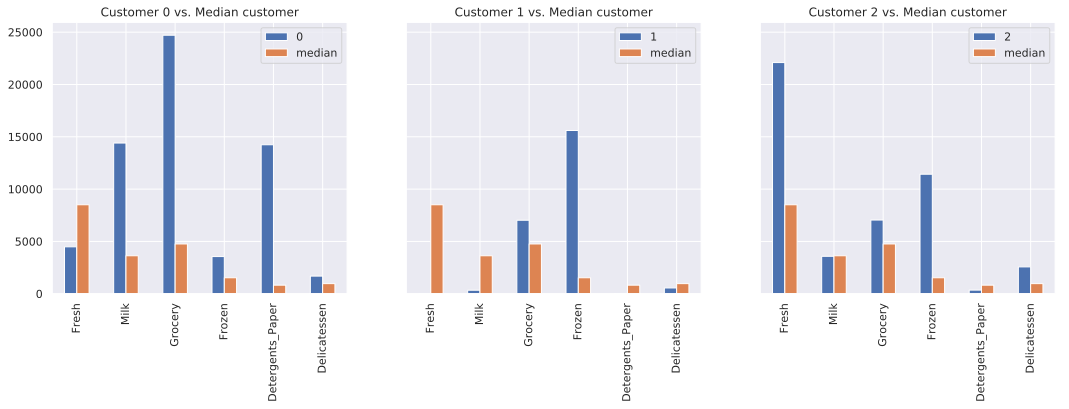

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,5), sharey=True)
samples2.iloc[[0,3],:].transpose().plot(kind="bar", ax=ax1, title="Customer 0 vs. Median customer")
samples2.iloc[[1,3],:].transpose().plot(kind="bar", ax=ax2, title="Customer 1 vs. Median customer")
samples2.iloc[[2,3],:].transpose().plot(kind="bar", ax=ax3, title="Customer 2 vs. Median customer")

**Analysis**

Sample 0: This establishment could be a supermarket/large grocery store. This is clear from the charts above which show that this establishment carries a diverse range of goods. All categories are well-represented with a huge focus Grocery, Milk and Detergents_Paper where they order >5 times more than the median customer. 


Sample 1: This establishment could be large fast-food restaurant which needs a lot of frozen meats and some groceries (condiments etc.). This is quite clear from the extremely high levels of frozen goods they buy (compared to the median customer) and the slightly above median grocery value. It may also be medium-sized grocery store with a large frozen department or just be the Frozen department of a supermarket (perhaps they get their other products elsewhere and this wholesaler is their main source for frozen).


Sample 2: This establishment could be a Market specializing in fresh foods, with a thriving frozen food section and some groceries as well. 
In general, the samples show purchases across the categories, but the distribution of value across the 3 gives a hint as to their focus. My best guesses are: Large Supermarket, Large Fast-Food Outlet, and Fresh Market for the respective samples.

### Implementation: Feature Relevance

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:

Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.
Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
Import a decision tree regressor, set a random_state, and fit the learner to the training data.
Report the prediction score of the testing set using the regressor's score function.

In [0]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
dropped_feature = 'Detergents_Paper'
target = data[dropped_feature]
new_data = data.drop([dropped_feature],axis=1)

In [21]:
new_data.head()

Fresh  Milk  Grocery  Frozen  Delicatessen
0  12669  9656     7561     214          1338
1   7057  9810     9568    1762          1776
2   6353  8808     7684    2405          7844
3  13265  1196     4221    6404          1788
4  22615  5410     7198    3915          5185

In [0]:
#Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=0)

In [23]:
# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Predicting {} using the rest of the features: \n----\n The coeficient of determination, R2 score is {}".format(
    dropped_feature, score))

Predicting Detergents_Paper using the rest of the features: 
----
 The coeficient of determination, R2 score is 0.7286551812541454


# Question 2

Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?<br>
Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.

**Answer:**

I chose to predict Detergents_Paper using all the other predictors and the reported score was 0.728655181254 which is significantly higher than 0.5 meaning that a huge portion of the variance or signal in Detergents_Paper is also explained by some of the other existing variables. <br>
In particular, the **feature importances and the correlation heatmap plot** below confirm this suspicion. The two categories are strongly positively correlated. <br>
So, as long as we have Grocery as a feature, this makes Detergents_Paper somewhat redudant in explaining some of the variations and customer spending habbits since we most of the information it conveys is already captured by Grocery.<br>
Given the above, I would suspect that *Detergents_Paper is not very relevant to identify customers spending habbits* in this case.<br>

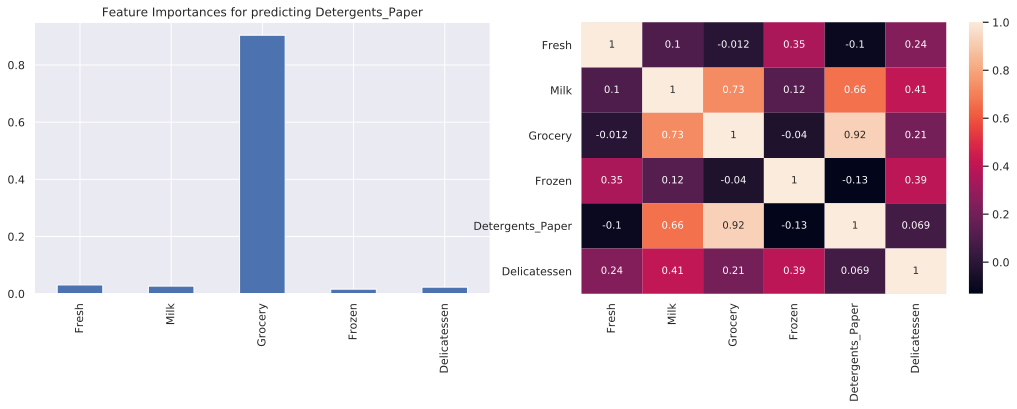

In [24]:
# Exploring the relations with visuals
plt.subplots(1,2,figsize=(18,5))
# We can plot the feature importances to see what's going on
plt.subplot(121)
pd.Series(regressor.feature_importances_, index=new_data.columns).transpose().plot(
    kind="bar", title="Feature Importances for predicting {}".format(dropped_feature))
# We can also confrim this using a heatmap of the correlations
plt.subplot(122)
sns.heatmap(data=data.corr(), annot=True)

### Visualize Feature Distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [25]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.3, figsize=(14, 10),diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8677a32c18>,
      dtype=object)

# Question 3

Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?

Hint: Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Yes there are pairs of features that exhibit some correlations as follows (see heat map and charts above):
Strong Correlations:<br>
Grocery and Detergent_Paper with 0.92 correlation<br>
Milk and Grocery with 0.73 correlation<br>
Milk and Detergent_Paper with 0.66 correlation<br>
Weak Correlations:<br>

Milk and Delicatessen with 0.41 correlation
Frozen and Delicatessen with 0.39 correlation
Fresh and Frozen with 0.35 correlation
This confirms my suspicion that Detergents_Paper may not be very relevant since it is very strongly correlated (0.92) to Grocery. It also shows that Milk may also contain similar information to Grocery and Detergent_Paper, based on the high correlations.<br>

Joint Feature Distributions The data for the correlated feeatures is distributed in a linear fashion, from the origin and along the diagonal. For the strongly correlated features, this linear distribution is clear to see, but not so much for the weakly correlated features. For the non-corelated features, they seem to generally have a distribution with the many small values crowded near the origin but also a number of extremely high values scattered as if exploding outwards. From the summary tables produced before, we can see that the means of most of the categories are significantly higher than their median which suggests a wide range in the data (confirmed by looking at the interquartile range) below. <br>

This suggests the presence of outliers Individual Feature Distributions Finally, looking at each individual feature, the distribution is far from normal. In fact, we see that for all of them, their frequency distributions are shaped much like an exponential distribution which has a significantly right-skewed (positive-skewed) shape, where most of the values are to the left of the distribution.It is characterized by many small values (to the left) and then a long tail extending to the right for the few very high values. Such a distribution is also prone to outliers. 

### Data Preprocessing

In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

- Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
- Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

In [26]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha=0.3, figsize=(14, 10),diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86770fb550>,
      dtype=object)

### Observation

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).
Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [27]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.408271  9.574914  10.114882  8.174421          9.563459      7.427144
1   1.098612  5.808142   8.856661  9.655090          2.708050      6.309918
2  10.003152  8.181720   8.859505  9.343297          5.837730      7.849324

### Implementation: Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.<br>
In the code block below, you will need to implement the following:<br>
Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.<br>
Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.<br>
Assign the calculation of an outlier step for the given feature to step.<br>
Optionally remove data points from the dataset by adding indices to the outliers list.<br>
NOTE: If you choose to remove any outliers, ensure that the sample data does not contain any of these points!<br>
Once you have performed this implementation, the dataset will be stored in the variable good_data.<br>

In [28]:
aSourceDictionary = { 'abc' : [1,2,3] , 'ccd' : [4,5] }
aTargetDictionary = {}
for aKey in aSourceDictionary:
        aTargetDictionary[aKey] = []
        aTargetDictionary[aKey].extend(aSourceDictionary[aKey])
print (aTargetDictionary)

{'abc': [1, 2, 3], 'ccd': [4, 5]}


In [29]:
# For each feature find the data points with extreme high or low values
# I would like to also remove outliers for in the remove list below(edit the list for different features)
remv_list = {'Grocery', 'Milk' ,'Detergents_Paper'} # this is tuple
outliers_dict ={}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Add to outlier dictionary to be sorted later
    outliers_dict[feature] = log_data[~((log_data[feature] >= Q1 - step) & 
                                       (log_data[feature] <= Q3 + step))].index.tolist()

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
66    2.197225   7.335634   8.911530   5.164786          8.151333      3.295837
109   7.248504   9.724899  10.274568   6.511745          6.728629      1.098612
128   4.941642   9.087834   8.248791   4.955827          6.967909      1.098612
137   8.034955   8.997147   9.021840   6.493754          6.580639      3.583519
142  10.519646   8.875147   9.018332   8.004700          2.995732      1.098612
154   6.432940   4.007333   4.919981   4.317488          1.945910      2.079442
183  10.514529  10.690808   9.911952  10.505999          5.476464     10.777768
184   5.789960   6.822197   8.457443   4.304065          5.811141      2.397895
187   7.798933   8.987447   9.192075   8.743372          8.148735      1.098612
203   6.368187   6.529419   7.703459   6.150603          6.860664      2.890372
233   6.871091   8.513988   8.106515   6.842683          6.013715      1.945910
285  10.602965   6.461468   8.188689   6.948897          6.077642      2.890372
289  10.663966   5.655992   6.154858   7.235619          3.465736      3.091042
343   7.431892   8.848509  10.177932   7.283448          9.646593      3.610918

In [30]:
outliers_dict

{'Delicatessen': [66,
  109,
  128,
  137,
  142,
  154,
  183,
  184,
  187,
  203,
  233,
  285,
  289,
  343],
 'Detergents_Paper': [75, 161],
 'Fresh': [65,
  66,
  81,
  95,
  96,
  128,
  171,
  193,
  218,
  304,
  305,
  338,
  353,
  355,
  357,
  412],
 'Frozen': [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 'Grocery': [75, 154],
 'Milk': [86, 98, 154, 356]}

In [31]:
outliers_dict.values()

dict_values([[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412], [86, 98, 154, 356], [75, 154], [38, 57, 65, 145, 175, 264, 325, 420, 429, 439], [75, 161], [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]])

In [0]:
ol_values=outliers_dict.values()

In [33]:
type(ol_values)

dict_values

In [0]:
def convert(list): 
    return tuple(list)

In [35]:

print(convert(ol_values))

([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412], [86, 98, 154, 356], [75, 154], [38, 57, 65, 145, 175, 264, 325, 420, 429, 439], [75, 161], [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343])


In [0]:
ol_tuple=convert(ol_values)

In [0]:
# Find the outliers tha appear more than once in the dataset
import collections
col = collections.Counter(np.sum(ol_tuple))
common_outliers_count = {}
for key in col.keys():
    if col[key]>1:
        common_outliers_count[key] = col[key]
    

In [38]:
common_outliers_count

{65: 2, 66: 2, 75: 2, 128: 2, 154: 3}

In [39]:
common_outliers_count.keys()

dict_keys([65, 66, 128, 154, 75])

In [0]:
tuple_key=common_outliers_count.keys()

In [41]:
convert(tuple_key)

(65, 66, 128, 154, 75)

In [0]:
tuple_key=convert(tuple_key)

In [43]:
remv_list

{'Detergents_Paper', 'Grocery', 'Milk'}

In [44]:
outliers_dict

{'Delicatessen': [66,
  109,
  128,
  137,
  142,
  154,
  183,
  184,
  187,
  203,
  233,
  285,
  289,
  343],
 'Detergents_Paper': [75, 161],
 'Fresh': [65,
  66,
  81,
  95,
  96,
  128,
  171,
  193,
  218,
  304,
  305,
  338,
  353,
  355,
  357,
  412],
 'Frozen': [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 'Grocery': [75, 154],
 'Milk': [86, 98, 154, 356]}

In [0]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = np.sum((outliers_dict[x] for x in remv_list)) + tuple_key
# Make sure we are not removing our sample customers from the data!
outliers = [x for x in outliers if x not in sample_indices]
print("\n-----\nAll outliers:\n {} \n-----\n Common Outliers Count:\n {}  \
\n-----\nOutliers selected for removal: {}".format(outliers_dict, common_outliers_count, outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [47]:
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

In some notebooks,outliers are suggested to removed. I have actually normalized them

In [0]:
from sklearn.preprocessing import StandardScaler
good_data = StandardScaler().fit_transform(data)

In [0]:
norm_data=pd.DataFrame(good_data).rename(columns = {0:'Fresh', 1: 'Milk', 2:'Grocery',3:'Frozen',4:'Detergents_Paper',5:'Delicatessen' })

In [50]:
norm_data.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569     -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407      0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232      2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588      0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918      1.299347

# Question 4

Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the outliers list to be removed, explain why

In [0]:
# Number of outliers in each category - shown below
d = {x:len(outliers_dict[x]) for x in outliers_dict}
s = pd.Series(d.values(), index=d.keys())

In [52]:
s

Fresh               (16, 4, 2, 10, 2, 14)
Milk                (16, 4, 2, 10, 2, 14)
Grocery             (16, 4, 2, 10, 2, 14)
Frozen              (16, 4, 2, 10, 2, 14)
Detergents_Paper    (16, 4, 2, 10, 2, 14)
Delicatessen        (16, 4, 2, 10, 2, 14)
dtype: object

### Feature Transformation

In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.<br>

In the code block below, you will need to implement the following:

Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

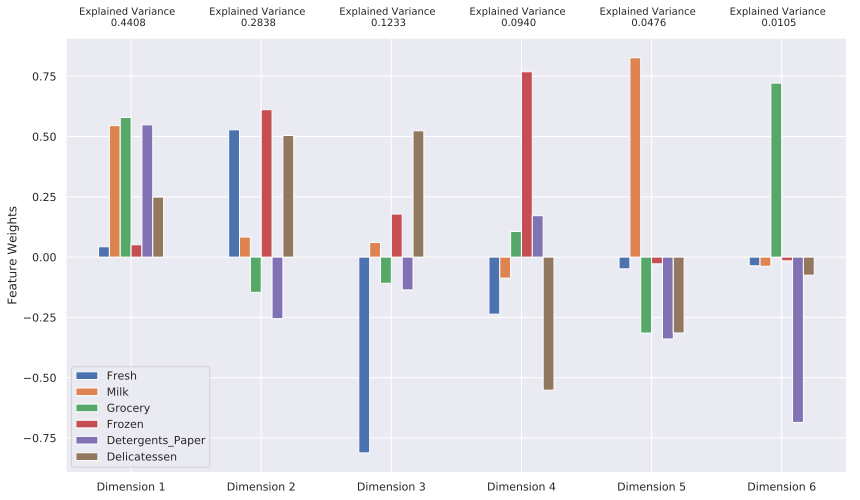

In [53]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(norm_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(norm_data, pca)

# Question 5

How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.<br>
Hint: A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the indivdual feature weights.

In [54]:

# Display the ratio of variance explained
print("Variance explained by PC1 and PC2: {}".format(sum(pca.explained_variance_ratio_[:2])))
print("Variance explained by first four PCs: {}".format(sum(pca.explained_variance_ratio_[:4])))

Variance explained by PC1 and PC2: 0.7245929240774498
Variance explained by first four PCs: 0.9418920905750293


**Answer:**

Explained Variance <br>

The first and second principal components explain ~ 84% (see above) of the total variance in the data, which is quite significant
The first four principal components explained almost ~97% (see above) of the data which is almost all of the variance in the data!

Customer Spending in the the four major dimensions

- PC1: This dimension explains about 45% of the variance in the data. It terms of customer spending, it represents the customers who dominantly spend on the Detergents_Paper category. They will also spend on the Grocery and Milk category with a a little bit of Delicatessen. They are unlikely to spend on the Fresh and Frozen categories.
- PC2: This dimension explains about 40% of the variance in the data. This dimension shows customers who spend heavily on the Fresh category, and quite significantly on the Frozen and Delicatessen. They also spend on Milk, Grocery, and Detergents_Paper but at much lower rates. This would be the only customer group that actually spends across all categories.
- PC3: This dimension explains about 7% of the variance in the data. This dimension represents customers who mostly spend on Delicatessen and Frozen categories, with Delicatessen being the major focus. They almost never buy anything from Fresh and rarely buy anything from the Detergents_Paper category.
- PC4: This dimension explains about 4% of the variance in the data. This dimension represents customers who mostly buy from the Frozen category and almost never from the Delicatessen.They would sometimes buy from the Detergents_Paper category but rarely from the Fresh category. Very little spending on Grocery and Milk.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points

In [55]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  Dimension 6
0      18.9515      10.0584      -3.3009       2.0728      -1.4949      -0.6122
1      11.8927       8.1615       3.1578       4.5756      -1.2176       3.6492
2      15.6540      12.8462      -3.6073       1.7093      -1.2288       0.9828

In [0]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(norm_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(norm_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [57]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      18.9515      10.0584
1      11.8927       8.1615
2      15.6540      12.8462

### Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.
Run the code cell below to produce a biplot of the reduced-dimension data.

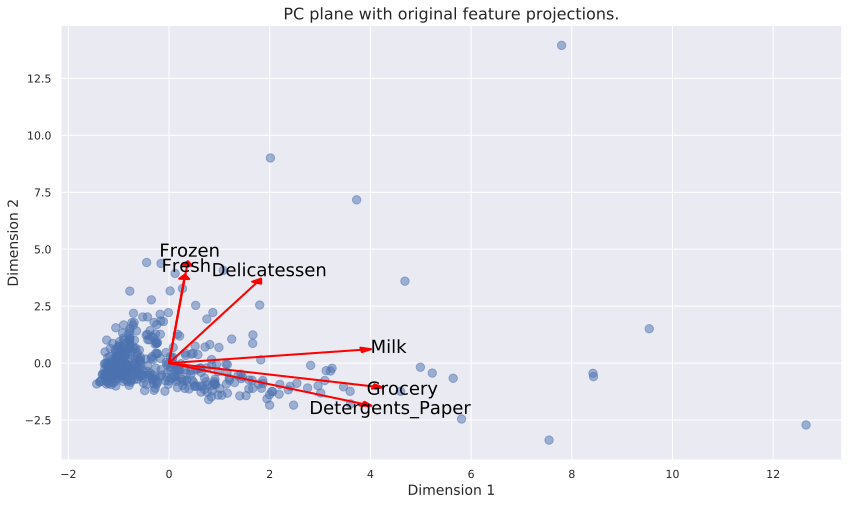

In [58]:
vs.biplot(norm_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.<br>

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?<br>

### Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.<br>

### Question 6<br>

What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

**Answer:**

Advantages of using KMeans Clustering<br>

- It is fast, and efficient to implement KMeans algorithms. The time complexity is linear and thus depends on n, the number of observations in the data. This means it is well-suited for large datasets.

- The clustering results from KMeans are usually clear, unambiguous and readily accessible/intepretable

- Although a lot of assumptions may not hold for real sceanarios, KMeans still work very well in practice

**Advantages of using Gaussian Mixed Model Clustering**

- It is flexible: it is not restricted to the clustering according to distance but rather according to probability. Thus it allows more flexibility in terms of cluster covariance and the shape of the cluster is not restricted to a sphere/circle. It does not have to assume that features are independent of each other (a very rare occurrence in the real world).

- It allows for multi-class membership to varying degrees: GMM is not deterministic and thus assigns each point a probability that it belongs to each of the classes, eventually clustering it in the cluster with highest probability. This allows it to deal well with real-world situations where membership to a cluster can be ambiguous or mixed.

- Given what I know so far, I think the Gaussian Mixed Model would be more approapriate to apply to the wholesale data because we have already observed some high correlations among the features which may indicate the presence of some hidden, latent variables that may not be measurable but are showing up in the interactions between the variables. Additionally, it is clear that there are some data points that have strong influence from several feautures which will require a flexible, probablistic model to do the clustering as opposed to KMeans which is a deterministic model with less flexibility for observations to belong to several clusters to varying degrees. Additionally, we don't know if the clusters are spherical so we need GMM for the flexibility.

### Implementation: Creating Clusters

Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.<br>

In the code block below, you will need to implement the following:<br>

- Fit a clustering algorithm to the reduced_data and assign it to clusterer.<br>
- Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.<br>
- Find the cluster centers using the algorithm's respective attribute and assign them to centers.<br>
- Predict the cluster for each sample data point in pca_samples and assign them sample_preds.<br>
- Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.<br>
- Assign the silhouette score to score and print the result.<br>

In [0]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
clusterer = GaussianMixture(n_components= 2, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

# Question 7

Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score? 

In [0]:
# Make reusable function to campare silhouette score across number of clusters and even different estimators
def nClusterScores(estimator, data, samples):
    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score
    
    scores =[]
    clusters = []
    for i in range(2,7):
        # fit and predict
        clusterer = estimator(i)
        clusterer.fit(reduced_data)
        preds = clusterer.predict(reduced_data)
        scores.append(silhouette_score(data, preds))
        clusters.append(i)
    print("\nSilhouette Scores for {}:\n------\n".format(estimator))
    print(zip(clusters,scores))
    # plot results
    plt.plot(clusters, scores)
    plt.title(estimator)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.ylim(0,1)    


Silhouette Scores for <class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>:
------


Silhouette Scores for <class 'sklearn.cluster.k_means_.KMeans'>:
------



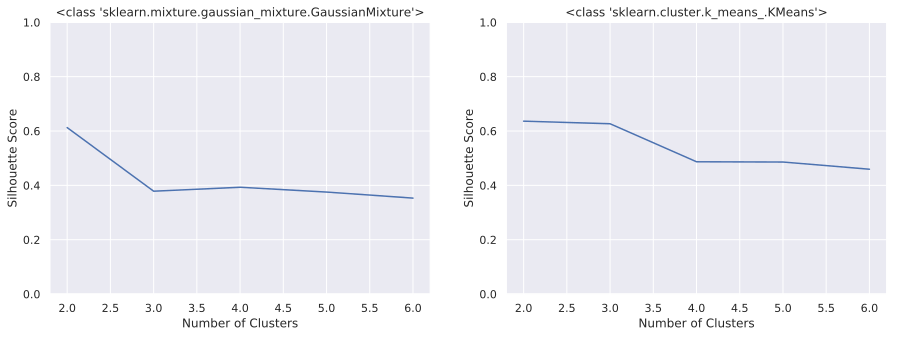

In [61]:
# Let's plot the silhouhette scores using the resuable function for both KMeans and GMM
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
nClusterScores(GaussianMixture, reduced_data, pca_samples)
plt.subplot(122)
nClusterScores(KMeans, reduced_data, pca_samples)

### Answer:

From trying all the number of clusters from 2 to 6 for Gaussian Mixed Models (see left chart above), we get the following pairs of number of cluster and score respectively.<br>

(2, 0.41744547874080407), (3, 0.3967595409112693), (4, 0.31315093671640665), (5, 0.31114721881568558), (6, 0.30849276659583047) <br>

2 clusters appear to be the best as they give the highest score, which means that the customers in each cluster are more similar to each other when you have two clusters than when you have any other number of clusters.<br>
This number of clusters (2) also seems to be the best choice even for the KMeans clustering algorithm (see right chart above), thus this validates our findings. Also notice that KMeans achieves a slightly higher Silhouette score than GMM for 2 clusters, but the difference is miniscule.<br>

### Cluster Visualization

Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters.

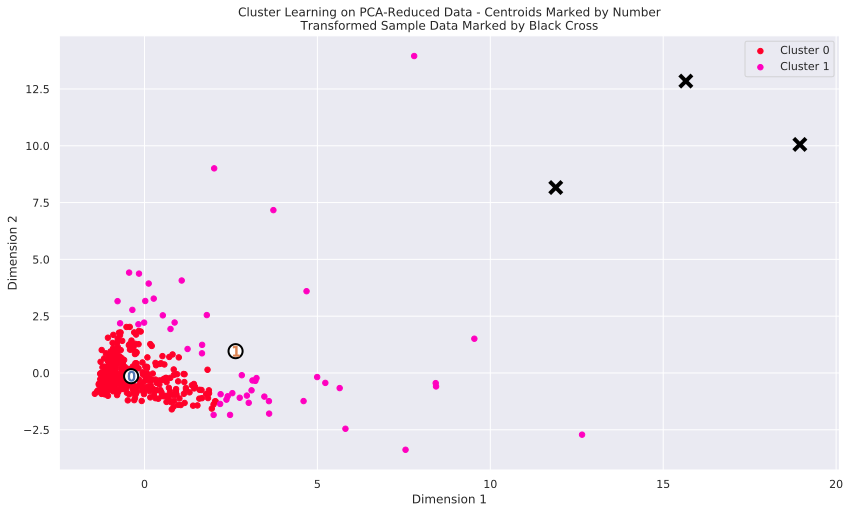

In [62]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

We can see how normalization helped us instead of removing outliers. We can see a better clustering and clearly crossed points are far from sample points.

### Implementation: Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.<br>

In the code block below, you will need to implement the following:<br>

Apply the inverse transform to centers using pca.inverse_transform and assign the new centers to log_centers.<br>
Apply the inverse function of np.log to log_centers using np.exp and assign the true centers to true_centers.<br>

In [63]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0    1.0   1.0      1.0     1.0               1.0           1.0
Segment 1    2.0   5.0      4.0     2.0               3.0           3.0

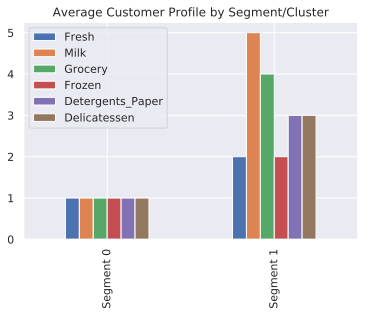

In [64]:
# Visualize for better idea of the average customer in each cluster
true_centers.plot(kind="bar", title="Average Customer Profile by Segment/Cluster")

# Question 8

Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?<br>
Hint: A customer who is assigned to 'Cluster X' should best identify with the establishments represented by the feature set of 'Segment X'.<br>

Average Total Value of a customer in each segment :

Segment 0     6.0
Segment 1    19.0
dtype: float64


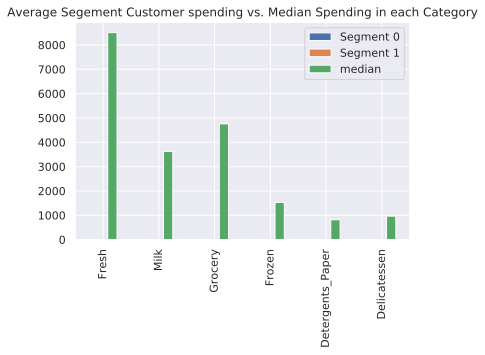

In [65]:
print("Average Total Value of a customer in each segment :\n")
print(true_centers.sum(axis=1))
true_centers.append(median).transpose().plot(kind="bar", title = "Average Segement Customer spending vs. Median Spending in each Category")

**Answer:**

Segment 0: Likely to be Markets and Fast-Food outlets. Customers in this segment spend a lot, and predominantly on the Fresh category and also on the Frozen category. Their spending in Fresh category (~9000 m.u.)is more than double the spending by Segment 1 customers in this category and it is a few hundred dollars more than the median spending in this category. They also spend more than the both the median customer and the average Segment 1 customer in the Frozen category<br>
Segment 1: Likely to be Supermarkets and Grocery Stores. These customers spend significanlty on the Grocery, Milk and Detergent_Paper categories. In all 3 categories, they spend at least twice as much as the median customer and over 3 times the spending of a Segment 0 customer in each category.
Overall, the Segement 1 customers have a higher spending value per year: almost 26K m.u. vs. the ~17K m.u. for Segment 0. Generally the Delicatessen category spending in low and both Segments spend roughly the same in this category.<br>

# Question 9

For each sample point, which customer segment from Question 8 best represents it? Are the predictions for each sample point consistent with this?<br>

Run the code block below to find which cluster each sample point is predicted to be.<br>

In [66]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [67]:
samples

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   4484  14399    24708    3549             14235          1681
1      3    333     7021   15601                15           550
2  22096   3575     7041   11422               343          2564

**Answer:**

Sample 0 is best represented by Segment 1 because it has very high Grocery, Milk, and Detergents_Paper spending. The overall spending is also very high, characteristic of Segement 1 as stated in Question 8. See also answer to Question 1 which is consistent with this finding.<br>

Sample 1 is best represented by Segment 0 because it has very high Frozen category spending. See also answer to Question 1 which is consistent with this finding.<br>

Sample 2 is also best represented by Segment 0, given its very high spending in the Fresh category as well as significant spening in the Frozen category as well. See also answer to Question 1 which is consistent with this finding.<br>

The predictions produced by the clustering are also consistent with the the findings above, and at the beginning of the exercise<br>

### Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data.<br> Finally, you will compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.<br>

# Question 10
Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.

How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

- Hint: Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### A-B Testing Number of Customers by Segment

In [68]:
n_tot = len(preds)
n_seg1 = preds.sum()
n_seg0 = n_tot - n_seg1
print("Total Number of Customers (after removing outliers): {} \n---".format(n_tot))
print("Segment 0 Customers : {} \n---".format(n_seg0))
print("Segment 1 Customers : {} \n---".format(n_seg1))

Total Number of Customers (after removing outliers): 440 
---
Segment 0 Customers : 390 
---
Segment 1 Customers : 50 
---


In [69]:
# import the relevant libraries
import pandas as pd
import os
from scipy.stats import chi2_contingency

# import the data and reset index
ab_data = pd.DataFrame({'Segment':pd.Series([0,1]), 'Negative':pd.Series([15,20]), 'Positive':pd.Series([25,10])})
ab_data = ab_data.set_index('Segment')

# chi2 will only take an array?
observed = ab_data.values
print("Contingency Matrix:\n---\n {}\n---".format(observed))

# calculate and print the result of the Chi-Squared Test of Independence
result = chi2_contingency(observed)
chisq, p = result[:2]
print('chisq = {}, p = {}'.format(chisq, p))

Contingency Matrix:
---
 [[15 25]
 [20 10]]
---
chisq = 4.725, p = 0.029727183306054526
